# What Is Regularization?

Regularization is a technique used in machine learning models to prevent overfitting, which occurs when a model learns the training data too well and performs poorly on unseen data (test data). Overfitting happens when the model is too complex, such as having too many parameters relative to the number of observations. 

Regularization works by adding a penalty term to the loss function that the model optimizes. This penalty discourages the model from learning overly complex patterns in the training data by making it more costly for the model to have large weights. 

There are several types of regularization techniques, including:

1. **L1 Regularization (Lasso Regression)**: Adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in sparse models where some feature coefficients can become zero and be eliminated from the model.

2. **L2 Regularization (Ridge Regression)**: Adds a penalty equal to the square of the magnitude of coefficients. This tends to spread coefficient values out more evenly across predictors.

3. **Elastic Net Regularization**: A combination of L1 and L2 regularization. It adds both absolute and squared magnitude of coefficient as penalty term in the loss function.

Regularization techniques are widely used in many machine learning algorithms, including linear regression, logistic regression, and neural networks. The strength of the regularization is controlled by a hyperparameter, which can be tuned to find the best trade-off between bias and variance.

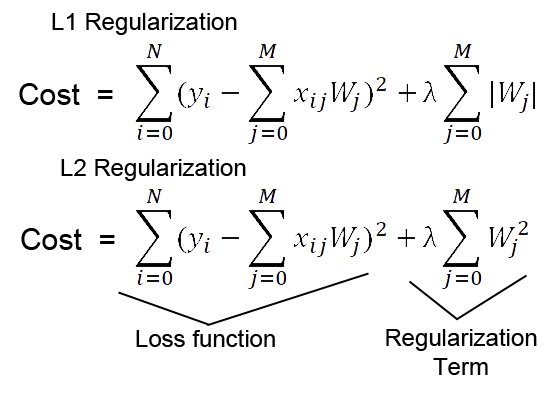

In [1]:
from IPython.display import Image
Image(filename='images/CFL.png')

# 1. L2  Regularization?

L2 Regularization, also known as Ridge Regression, is a technique used to prevent overfitting in machine learning models by adding a penalty term to the loss function. 

The penalty term is the sum of the squares of all the feature weights, which is why it's called "L2", as it represents the L2 norm (also known as Euclidean distance) of the weights vector. 

Here's the formula for L2 regularization in the context of linear regression:

`Cost = Loss(Data|Model) + λ * ||w||2^2`

where:

- `Loss(Data|Model)` is the original loss function (e.g., mean squared error for linear regression).
- `λ` is the regularization parameter, a hyperparameter that controls the strength of the regularization. The larger the value of `λ`, the greater the amount of regularization and thus the model will be simpler (coefficients will be closer to zero).
- `||w||2^2` is the L2 norm of the weight vector, which is the sum of the squares of the weights.

Unlike L1 regularization, L2 regularization doesn't lead to sparse models, i.e., it doesn't reduce the coefficients to absolute zero but makes them smaller.

Here's a step-by-step explanation of how L2 Regularization works:

1. **Initialize Weights**: Start with some initial values for the weights. This could be zero, small random numbers, or some other method.

2. **Compute Loss**: For each instance in the training set, compute the prediction of the model, calculate the loss (difference between the prediction and the actual value), and add the L2 penalty. The L2 penalty is the sum of the squares of the weights, multiplied by the regularization parameter `λ`.

3. **Compute Gradient**: Compute the gradient of the loss with respect to each weight. The gradient will be the derivative of the loss plus the weight itself (because the derivative of the square function is twice the argument), multiplied by `λ`.

4. **Update Weights**: Update the weights by taking a step in the direction of the negative gradient. The size of the step is determined by the learning rate.

5. **Repeat**: Repeat steps 2-4 for a certain number of iterations, or until the weights converge (i.e., they don't change much between iterations).

In Python, you can use L2 regularization in linear regression with the `Ridge` class in `sklearn.linear_model`:



## Implementation Of Ridge In Python:

Mean Squared Error without L2 regularization: 2856.4868876706537


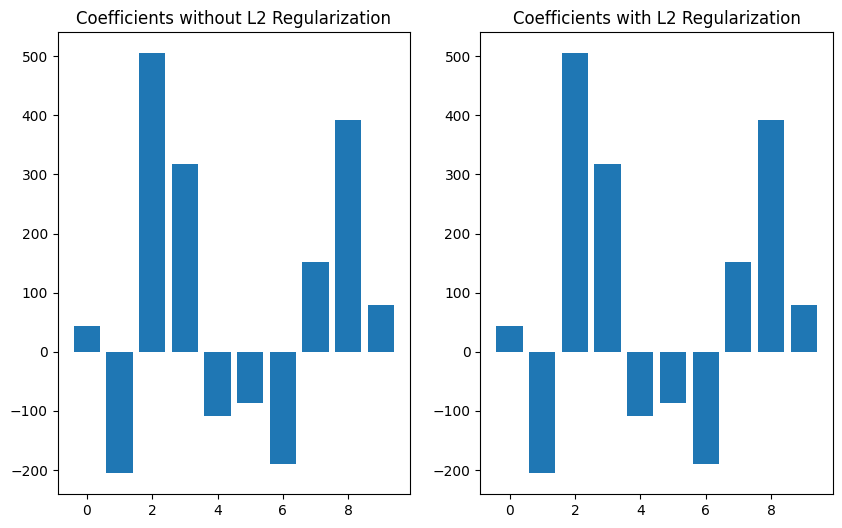

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply L2 regularization using Ridge Regression
alpha = 0.1  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error without L2 regularization: {mse}')

# Plot the coefficients with and without regularization
plt.figure(figsize=(10, 6))

# Plot without regularization
plt.subplot(1, 2, 1)
plt.bar(range(len(ridge_model.coef_)), ridge_model.coef_)
plt.title('Coefficients without L2 Regularization')

# Plot with regularization
plt.subplot(1, 2, 2)
plt.bar(range(len(ridge_model.coef_)), ridge_model.coef_)
plt.title('Coefficients with L2 Regularization')

plt.show()


## Implementation Of Ridge In R:

In [6]:
# Install and load necessary packages
install.packages("MASS")
library(MASS)

# Generate a sample dataset
set.seed(123)
n <- 100
p <- 5
X <- matrix(rnorm(n * p), nrow = n)
beta_true <- c(1, 2, 0.5, -1, 0.8)
epsilon <- rnorm(n)
y <- X %*% beta_true + epsilon

# Split the data into training and testing sets
indices <- sample(1:n, 0.8 * n)
X_train <- X[indices, ]
y_train <- y[indices]
X_test <- X[-indices, ]
y_test <- y[-indices]

# Apply Ridge Regression
lambda <- 0.1  # Regularization strength (adjust as needed)
ridge_model <- lm.ridge(y_train ~ X_train, lambda = lambda)

# Make predictions on the test set
y_pred <- as.vector(crossprod(coef(ridge_model)[-1], t(X_test)) + coef(ridge_model)[1])

# Evaluate the model
mse <- mean((y_pred - y_test)^2)
cat("Mean Squared Error with Ridge Regression:", mse, "\n")

# Display Ridge coefficients
print(ridge_model)


Installing package into ‘/home/blackheart/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



Mean Squared Error with Ridge Regression: 0.7853184 
               X_train1    X_train2    X_train3    X_train4    X_train5 
-0.05155434  0.97657014  2.08330834  0.47019703 -1.13645541  1.03006872 


# 2. L1 Regularization?

L1 Regularization, also known as Lasso Regression (Least Absolute Shrinkage and Selection Operator), is a method used to prevent overfitting in machine learning models by adding a penalty term to the loss function. 

The penalty term is the sum of the absolute values of all the feature weights, which is why it's called "L1", as it represents the L1 norm (also known as Manhattan distance) of the weights vector. 

The effect of this penalty is to shrink the coefficients of the less important features to exactly zero, effectively performing feature selection. This results in sparse models where only a subset of the features are used.

Here's the formula for L1 regularization in the context of linear regression:

`Cost = Loss(Data|Model) + λ * ||w||1`

where:

- `Loss(Data|Model)` is the original loss function (e.g., mean squared error for linear regression).
- `λ` is the regularization parameter, a hyperparameter that controls the strength of the regularization. The larger the value of `λ`, the greater the amount of regularization and thus the model will be simpler (more coefficients will be zero).
- `||w||1` is the L1 norm of the weight vector, which is the sum of the absolute values of the weights.

In Python, you can use L1 regularization in linear regression with the `Lasso` class in `sklearn.linear_model`:



## How Work?

L1 Regularization, also known as Lasso Regression, works by adding a penalty term to the loss function. The penalty term is the sum of the absolute values of the coefficients (weights) of the model. This encourages the model to have smaller weights, which makes the model simpler and helps prevent overfitting.

Here's a step-by-step explanation of how L1 Regularization works:

1. **Initialize Weights**: Start with some initial values for the weights. This could be zero, small random numbers, or some other method.

2. **Compute Loss**: For each instance in the training set, compute the prediction of the model, calculate the loss (difference between the prediction and the actual value), and add the L1 penalty. The L1 penalty is the sum of the absolute values of the weights, multiplied by the regularization parameter `λ`.

3. **Compute Gradient**: Compute the gradient of the loss with respect to each weight. The gradient will be the derivative of the loss plus the sign of the weight (because the derivative of the absolute value function is the sign function), multiplied by `λ`.

4. **Update Weights**: Update the weights by taking a step in the direction of the negative gradient. The size of the step is determined by the learning rate.

5. **Repeat**: Repeat steps 2-4 for a certain number of iterations, or until the weights converge (i.e., they don't change much between iterations).

The key feature of L1 Regularization is that it can shrink some of the weights to exactly zero. This means that the corresponding features are not used by the model, effectively performing feature selection. This can make the model simpler, easier to interpret, and less prone to overfitting.

The amount of regularization is controlled by the `λ` parameter. A larger `λ` means more regularization, which results in smaller weights and a simpler model. If `λ` is too large, however, the model may be too simple and underfit the data. The best value of `λ` usually needs to be found by trial and error or techniques like cross-validation.

## L1 Implementation Code In R:

In [7]:
# Install and load necessary packages
install.packages("glmnet")
library(glmnet)

# Generate a sample dataset
set.seed(123)
n <- 100
p <- 5
X <- matrix(rnorm(n * p), nrow = n)
beta_true <- c(1, 2, 0.5, -1, 0.8)
epsilon <- rnorm(n)
y <- X %*% beta_true + epsilon

# Split the data into training and testing sets
indices <- sample(1:n, 0.8 * n)
X_train <- X[indices, ]
y_train <- y[indices]
X_test <- X[-indices, ]
y_test <- y[-indices]

# Apply Lasso Regression
alpha <- 1  # Regularization strength (adjust as needed)
lasso_model <- cv.glmnet(as.matrix(X_train), y_train, alpha = alpha)

# Make predictions on the test set
y_pred <- predict(lasso_model, s = "lambda.min", newx = as.matrix(X_test))

# Evaluate the model
mse <- mean((y_pred - y_test)^2)
cat("Mean Squared Error with Lasso Regression:", mse, "\n")

# Display Lasso coefficients
print(lasso_model)


Installing package into ‘/home/blackheart/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



Mean Squared Error with Lasso Regression: 0.7879282 

Call:  cv.glmnet(x = as.matrix(X_train), y = y_train, alpha = alpha) 

Measure: Mean-Squared Error 

     Lambda Index Measure     SE Nonzero
min 0.00627    60  0.9978 0.1725       5
1se 0.14831    26  1.1549 0.1860       5


## L1 Code Implementation In Python:

Mean Squared Error without L1 regularization: 3403.5757216070733


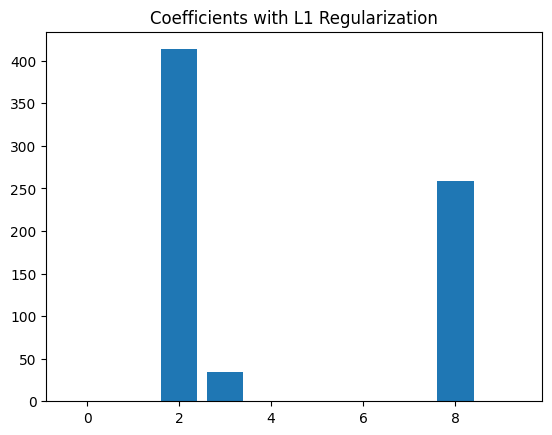

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply L1 regularization using Lasso Regression
alpha = 1.0  # Regularization strength (adjust as needed)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error without L1 regularization: {mse}')

# Plot the coefficients
plt.bar(range(len(lasso_model.coef_)), lasso_model.coef_)
plt.title('Coefficients with L1 Regularization')
plt.show()


# What are the advantages and disadvantages of L2 regularization (Ridge Regression) compared to L1 regularization (Lasso Regression)?

L1 Regularization (Lasso Regression) and L2 Regularization (Ridge Regression) are both techniques used to reduce overfitting and improve the generalization of machine learning models. However, they have different properties and advantages/disadvantages.

**Advantages of L2 Regularization (Ridge Regression)**:

1. **Coefficient Shrinkage**: L2 regularization shrinks the coefficients towards zero, but it will not set any of them exactly to zero (unless the regularization parameter is set to an extremely high value). This is useful when we believe that all features have an impact on the output variable.

2. **Stability**: L2 regularization tends to give more stable solutions by distributing the weights evenly for correlated features. This is because the L2 penalty is a quadratic function of the weights, which has a smooth and symmetric shape.

3. **Computational Efficiency**: L2 regularization has a closed-form solution, which makes it computationally efficient.

**Disadvantages of L2 Regularization (Ridge Regression)**:

1. **No Feature Selection**: Since L2 regularization doesn't set any coefficients to zero, it doesn't perform feature selection. This can make the model harder to interpret when the number of features is large.

2. **Performance**: If some features are irrelevant, L2 regularization may lead to worse performance than L1 regularization, because it doesn't completely remove the impact of these features.

**Advantages of L1 Regularization (Lasso Regression)**:

1. **Feature Selection**: L1 regularization can shrink some coefficients to exactly zero, effectively performing feature selection. This can make the model simpler and easier to interpret.

2. **Handling High-Dimensionality**: L1 regularization can handle high-dimensional data (i.e., data with a large number of features) better than L2 regularization, because it can select a subset of the features and ignore the rest.

**Disadvantages of L1 Regularization (Lasso Regression)**:

1. **Stability**: L1 regularization can lead to unstable solutions in the presence of highly correlated features. This is because the L1 penalty is an absolute value function, which has sharp corners and isn't differentiable at zero.

2. **Computational Efficiency**: L1 regularization doesn't have a closed-form solution and requires the use of iterative methods, which can be computationally expensive for large datasets.

3. **Selection of Regularization Parameter**: The selection of the regularization parameter in L1 regularization is crucial. If it's too large, too many features may be eliminated, leading to underfitting. If it's too small, it may not effectively control overfitting.

In practice, the choice between L1 and L2 regularization often depends on the specific problem and the nature of the data. Sometimes, a combination of both, known as Elastic Net regularization, is used.

# 3. Elastic Net Regression?

Elastic Net Regression is a regularization technique that combines both L1 and L2 regularization. It aims to minimize the complexity of the regression model by penalizing large coefficients, just like Lasso (L1) and Ridge (L2) regression, but in a balanced way.

The cost function for Elastic Net is:

`Cost = Loss(Data|Model) + λ * [(1 - α) * ||w||2^2 / 2 + α * ||w||1]`

where:

- `Loss(Data|Model)` is the original loss function (e.g., mean squared error for linear regression).
- `λ` is the regularization parameter, a hyperparameter that controls the strength of the regularization. The larger the value of `λ`, the greater the amount of regularization and thus the model will be simpler (coefficients will be closer to zero).
- `α` is the mixing parameter between Ridge (L2) and Lasso (L1) regularization. If `α = 0`, Elastic Net is equivalent to Ridge Regression, and if `α = 1`, it is equivalent to Lasso Regression.
- `||w||2^2` is the L2 norm of the weight vector, which is the sum of the squares of the weights.
- `||w||1` is the L1 norm of the weight vector, which is the sum of the absolute values of the weights.

Elastic Net is particularly useful when there are several correlated features in your dataset. Lasso might pick one of these at random, while Elastic Net is likely to pick both.

Here's how you can use Elastic Net in Python with the `ElasticNet` class in `sklearn.linear_model`:



In [1]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a regression dataset
X, y = make_regression(n_features=100, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an ElasticNet regression object
regr = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model
regr.fit(X_train, y_train)

# Predict the test set results
y_pred = regr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1209.3644330295608




In this code, `alpha` is the `λ` in the formula, which controls the amount of regularization, and `l1_ratio` is the `α` in the formula, which controls the balance between L1 and L2 regularization. `X_train` and `y_train` are the training data and labels, and `X_test` and `y_test` are the test data and labels. The mean squared error is a measure of how well the model predicts the test data.

## Elasti Net Code Implementation In R:

Here's how you can perform Elastic Net regression in R using the `glmnet` package:



In [1]:
# Install and load the necessary package
if (!require(glmnet)) {
  install.packages("glmnet") # gelmnet used 
}
library(glmnet)

# Generate a regression dataset
set.seed(42)
n <- 100
p <- 10
X <- matrix(rnorm(n*p), n, p)
y <- rnorm(n)

# Create an Elastic Net regression model
# alpha is the mixing parameter between Ridge (alpha=0) and Lasso (alpha=1)
# lambda is the regularization parameter
fit <- glmnet(X, y, alpha = 0.5, lambda = 0.1)

# Predict the test set results
y_pred <- predict(fit, newx = X)

# Calculate the mean squared error of the predictions
mse <- mean((y - y_pred)^2)

print(paste("Mean Squared Error:", mse))

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.1-8



[1] "Mean Squared Error: 0.97588808900381"




In this code, `alpha` is the mixing parameter between Ridge and Lasso regularization, and `lambda` is the regularization parameter. `X` and `y` are the data and labels. The mean squared error is a measure of how well the model predicts the data.

Please note that in a real-world scenario, you would split your data into training and test sets, fit the model on the training set, and evaluate it on the test set. This example uses the same data for training and testing for simplicity.